In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt

In [3]:
# Create the dataframe for the dataset
df = pd.read_csv('CBC_data.csv')
# Calculating the mean of every column (feature)
rbc_mean = df['RBC'].mean()
hgb_mean = df['HGB'].mean()
wbc_mean = df['WBC'].mean()
eos_cnt_mean = df['EOS.CNT'].mean()
mono_cnt_mean = df['MONO.CNT'].mean()
nut_cnt_mean = df['NUT.CNT'].mean()
pl_cnt_mean = df['PL.CNT'].mean()
lymp_cnt_mean = df['LYMP.CNT'].mean()
# Filling the all the missing values 
df['RBC'].fillna(rbc_mean, inplace=True)
df['HGB'].fillna(hgb_mean, inplace=True)
df['WBC'].fillna(wbc_mean, inplace=True)
df['EOS.CNT'].fillna(eos_cnt_mean, inplace=True)
df['MONO.CNT'].fillna(mono_cnt_mean, inplace=True)
df['NUT.CNT'].fillna(nut_cnt_mean, inplace=True)
df['PL.CNT'].fillna(pl_cnt_mean, inplace=True)
df['LYMP.CNT'].fillna(lymp_cnt_mean, inplace=True)
# Converts the dataframe into a numpy array
data = df.to_numpy()
# Converts the features that are not numerical values into integer values
encoder = OrdinalEncoder()
data_to_encode = data[:,[1, 2,3,4,6]]
encoder.fit(data_to_encode)
data[:, [1, 2,3,4,6]] = encoder.transform(data_to_encode)
data = data[:,[1,2,4,5,6,7,8,9,10,11,12,13,14]]
X_train_data = data[:300]
X_test_data = data[300:420]
print(X_train_data[0])
# X_train_data = data[:300]
# X_test_data = data[300:420]


[1.0 1.0 0.0 9 0.0 6.4 16.6 14.2 142.0 852.0 6390.0 210.0 6816.0]


In [4]:
pos_examples_count, neg_examples_count  = 0, 0
train_idx, test_idx = 0, 0
pos_check_count=0
neg_check_count=0
for i in range(len(data)):
    pos_check_count +=1
    if pos_examples_count == 150:
        break
    if data[i][4] == 1.0:
        X_train_data[train_idx,:] = data[i,:]
        pos_examples_count += 1
        train_idx += 1

for i in range(len(data)):
    neg_check_count +=1
    if neg_examples_count == 150:
        break
    if data[i][4] == 0.0:
        X_train_data[train_idx,:] = data[i,:]
        neg_examples_count += 1
        train_idx += 1

pos_examples_count, neg_examples_count = 0, 0
for i in range(pos_check_count, len(data)):
    if pos_examples_count == 60:
        break
    if data[i][4] == 1.0:
        X_test_data[test_idx,:] = data[i,:]
        pos_examples_count += 1
        test_idx += 1

for i in range(neg_check_count, len(data)):
    if neg_examples_count == 60:
        break
    if data[i][4] == 0.0:
        X_test_data[test_idx,:] = data[i,:]
        neg_examples_count += 1
        test_idx += 1


y_train = X_train_data[:, 4:5]
X_train = X_train_data[:, 5:]
X_train = np.hstack((X_train, X_train_data[:, [0,1, 2, 3]]))
y_test = X_test_data[:, 4:5]
X_test = X_test_data[:, 5:]
X_test = np.hstack((X_test, X_test_data[:, [0,1, 2, 3]]))


In [5]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train).astype(np.float32)
X_test_std = scaler.transform(X_test).astype(np.float32)
y_train = np.ravel(y_train).astype(np.int32)
y_test = np.ravel(y_test).astype(np.int32)

In [6]:
#Linear SVM with the different Regularization methods
lin_m = svm.SVC(kernel="linear")
lin_m.fit(X_train_std, y_train)
print("Linear SVM No regularization:")
print('Training accuracy:', accuracy_score(y_train, lin_m.predict(X_train_std)))
print('Testing accuracy:', accuracy_score(y_test, lin_m.predict(X_test_std)))

c_vals=[.001, .01, 1 , 10, 100]
for c in c_vals:
  lin_m = svm.LinearSVC(penalty="l1", dual=False, C=c, max_iter=100000)
  lin_m.fit(X_train_std, y_train)
  print("Linear SVM with L1 regularization and C = {}:".format(c))
  print('Training accuracy:', accuracy_score(y_train, lin_m.predict(X_train_std)))
  print('Testing accuracy:', accuracy_score(y_test, lin_m.predict(X_test_std)))

for c in c_vals:
  lin_m = svm.LinearSVC(penalty="l2", dual=False, C=c, max_iter=100000)
  lin_m.fit(X_train_std, y_train)
  print("Linear SVM with L2 regularization and C = {}:".format(c))
  print('Training accuracy:', accuracy_score(y_train, lin_m.predict(X_train_std)))
  print('Testing accuracy:', accuracy_score(y_test, lin_m.predict(X_test_std)))



Linear SVM No regularization:
Training accuracy: 0.67
Testing accuracy: 0.55
Linear SVM with L1 regularization and C = 0.001:
Training accuracy: 0.5
Testing accuracy: 0.5
Linear SVM with L1 regularization and C = 0.01:
Training accuracy: 0.62
Testing accuracy: 0.48333333333333334
Linear SVM with L1 regularization and C = 1:
Training accuracy: 0.6733333333333333
Testing accuracy: 0.5166666666666667
Linear SVM with L1 regularization and C = 10:
Training accuracy: 0.6833333333333333
Testing accuracy: 0.5833333333333334
Linear SVM with L1 regularization and C = 100:
Training accuracy: 0.6933333333333334
Testing accuracy: 0.6166666666666667
Linear SVM with L2 regularization and C = 0.001:
Training accuracy: 0.64
Testing accuracy: 0.4666666666666667
Linear SVM with L2 regularization and C = 0.01:
Training accuracy: 0.69
Testing accuracy: 0.5333333333333333
Linear SVM with L2 regularization and C = 1:
Training accuracy: 0.6766666666666666
Testing accuracy: 0.5166666666666667
Linear SVM with L

Polynomial SVM:
Polynomial SVM Degree 1:
Training accuracy: 0.6633333333333333
Testing accuracy: 0.55
Polynomial SVM Degree 2:
Training accuracy: 0.69
Testing accuracy: 0.5166666666666667
Polynomial SVM Degree 3:
Training accuracy: 0.7833333333333333
Testing accuracy: 0.49166666666666664
Polynomial SVM Degree 4:
Training accuracy: 0.8
Testing accuracy: 0.5083333333333333
Polynomial SVM Degree 5:
Training accuracy: 0.8566666666666667
Testing accuracy: 0.5333333333333333


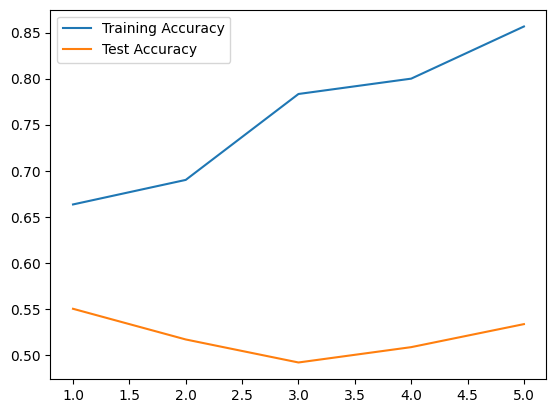

In [27]:
#Polynomial SVM as the degree increases
print("Polynomial SVM:")
degree = []
train_acc=[]
test_acc=[]
for i in range(1, 6):
  lin_m = svm.SVC(kernel="poly", degree = i)
  lin_m.fit(X_train_std, y_train)
  print('Polynomial SVM Degree {}:'.format(i))
  print('Training accuracy:', accuracy_score(y_train, lin_m.predict(X_train_std)))
  print('Testing accuracy:', accuracy_score(y_test, lin_m.predict(X_test_std)))
  degree.append(i)
  train_acc.append(accuracy_score(y_train, lin_m.predict(X_train_std)))
  test_acc.append(accuracy_score(y_test, lin_m.predict(X_test_std)))
plt.plot(degree, train_acc, label = "Training Accuracy")
plt.plot(degree, test_acc, label = "Test Accuracy")
plt.legend()
plt.show()


In [8]:
#Radial Bias SVM and k-fold cross validation for k from 2 to 9
print("Radial Bias SVM:")
gamma_vals = []
c_vals = []
for i in range(-3, 3):
  val = 10**i
  gamma_vals.append(val)
  c_vals.append(val)
grid = {"C": c_vals, "gamma": gamma_vals}
rbf_helper = svm.SVC(kernel='rbf')

for i in range(2, 10):
  new_grid = GridSearchCV(rbf_helper, grid, cv=i)
  new_grid.fit(X_train_std, y_train)
  best_model = new_grid.best_estimator_
  print("Best C value and Gamma value with {}-fold validation: {}".format(i,new_grid.best_params_))
  print("{}-fold accuracy: {}".format(i,new_grid.best_score_))
  print("Training accuracy: ", best_model.score(X_train_std, y_train))
  print("Testing accuracy: ", best_model.score(X_test_std, y_test))



Radial Bias SVM:
Best C value and Gamma value with 2-fold validation: {'C': 1, 'gamma': 0.01}
2-fold accuracy: 0.62
Training accuracy:  0.67
Testing accuracy:  0.5
Best C value and Gamma value with 3-fold validation: {'C': 0.001, 'gamma': 0.1}
3-fold accuracy: 0.62
Training accuracy:  0.67
Testing accuracy:  0.45
Best C value and Gamma value with 4-fold validation: {'C': 100, 'gamma': 0.01}
4-fold accuracy: 0.64
Training accuracy:  0.81
Testing accuracy:  0.5583333333333333
Best C value and Gamma value with 5-fold validation: {'C': 10, 'gamma': 0.001}
5-fold accuracy: 0.6366666666666666
Training accuracy:  0.6733333333333333
Testing accuracy:  0.4666666666666667
Best C value and Gamma value with 6-fold validation: {'C': 10, 'gamma': 0.01}
6-fold accuracy: 0.6433333333333334
Training accuracy:  0.7266666666666667
Testing accuracy:  0.5666666666666667
Best C value and Gamma value with 7-fold validation: {'C': 100, 'gamma': 0.01}
7-fold accuracy: 0.6332067710805251
Training accuracy:  0.8